In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_space_invaders

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('SpaceInvadersDeterministic-v4')
env = Monitor(env, './monitor/dqn/space_invaders', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_space_invaders, 
    replay_memory_size=0, 
#     render_mode='rgb_array'
)
agent.model.load_weights('./models/dqn/space_invaders.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<SpaceInvadersDeterministic-v4>>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x114101e48>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x1195260d0>,
    image_size=(84, 84),
    render_mode='human'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [07:53<00:00,  4.73s/game]


0     20.0
1     27.0
2     30.0
3     21.0
4     16.0
5     32.0
6     25.0
7     21.0
8     19.0
9     15.0
10    32.0
11    23.0
12    32.0
13    35.0
14    23.0
15    21.0
16    33.0
17    16.0
18    30.0
19    26.0
20    16.0
21    34.0
22    30.0
23    29.0
24    18.0
25    21.0
26    34.0
27    32.0
28    29.0
29    32.0
      ... 
70    18.0
71    24.0
72    27.0
73    16.0
74    32.0
75    16.0
76    35.0
77    42.0
78    27.0
79    29.0
80    27.0
81    34.0
82    21.0
83    31.0
84    32.0
85    32.0
86    20.0
87    22.0
88    29.0
89    17.0
90    22.0
91    31.0
92    28.0
93    33.0
94    19.0
95    21.0
96    26.0
97    24.0
98    25.0
99    34.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/dqn/fullydeterministic.csv')

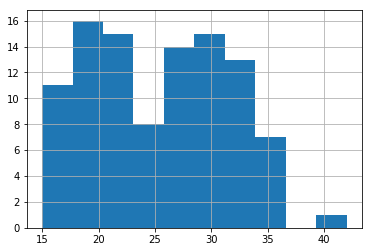

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      25.400000
std        5.981453
min       15.000000
25%       20.000000
50%       25.500000
75%       31.000000
max       42.000000
dtype: float64